# Shopify Data Science Intern Challenge

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Question 1

### a)

In [2]:
df = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv') # Load dataset

### Overview of the dataset

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Check for Null values

In [4]:
df.isnull().values.any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Since the problem arised from calculating the amount ordered, we should look at the order_amount column specifically

In [7]:
df['order_amount'].describe().apply("{0:.2f}".format)

count      5000.00
mean       3145.13
std       41282.54
min          90.00
25%         163.00
50%         284.00
75%         390.00
max      704000.00
Name: order_amount, dtype: object

### Analysis

As we can see the simple mean calculation will give us the value \\$3145.13. Since the standard deviation is pretty high, plus the outstanding maximum value of \\$704,000, we can get the gist why using average value would be incorrect. This means the data is pretty much very spread out and there exist extreme outliers in the dataset. Hence, the average value would not tell us anything much meaningful. In order to confirm, lets plot some box plot to see.

### Box plot

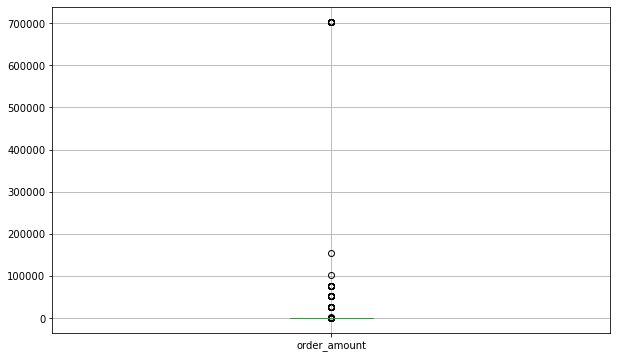

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
df.boxplot(column=['order_amount'])  
plt.show()

Our statement stands correct since there are lots of outliers (most likely the value \\$704,000) and the plot lies along the green line.

We should take a look at how many times the outliers occur to get a better gasp.

In [9]:
total_occurs = df.groupby(['order_amount','total_items']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
total_occurs = total_occurs.reset_index(drop=True)
total_occurs.head(20)

,order_amount,total_items,count
0,704000,2000,17
1,154350,6,1
2,102900,4,1
3,77175,3,9
4,51450,2,16
5,25725,1,19
6,1760,5,1
7,1408,4,2
8,1086,6,1
9,1064,8,1


Wow! That does not look right at all! These 100 sneakers shops are selling well... sneakers. Then how could this be? How could there be 17 times of transactions that have 2000 items in total with the price of \\$704,000. I conclude a money laundering scheme here!!! Or perhaps mistakes were made during data recording. Jokes aside, lets look at the outliers of \\$704,000, \\$7154,350, \\$102,900 more closely to see if they actually make sense or not.

Since we have the create_at column that indicates the date and time when the transactions were made, lets add that to our previous table.

In [10]:
total_occurs_date = df.groupby(['order_amount','total_items','created_at']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
total_occurs_date = total_occurs_date.reset_index(drop=True)
total_occurs_date.head(20)

,order_amount,total_items,created_at,count
0,704000,2000,2017-03-28 4:00:00,3
1,704000,2000,2017-03-15 4:00:00,1
2,704000,2000,2017-03-02 4:00:00,2
3,704000,2000,2017-03-04 4:00:00,1
4,704000,2000,2017-03-07 4:00:00,2
5,704000,2000,2017-03-12 4:00:00,1
6,704000,2000,2017-03-11 4:00:00,1
7,704000,2000,2017-03-17 4:00:00,1
8,704000,2000,2017-03-19 4:00:00,1
9,704000,2000,2017-03-22 4:00:00,1


Well well well, this settles it I guess. It does not make any sense at all for 3 transactions of \\$704,00 to happen at the same time and date. At this point, should I even check if it was paid in cash or credit?:)  

### Conclusion

- In conclusion, the data was highly skewed by the outstanding outliers. This mean it is not wise to use average to do analysis.
- I would recommend to use the median value we found, which was $284, that would make more sense.
- However, in order to eliminate the outliers even more during calculation, a better way is to use moving(rolling) median, which is robust to outliers. (Down below)

### b)

In [12]:
new_metric = df['order_amount'].rolling(30).median()
new_metric

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
4995    260.0
4996    260.0
4997    260.0
4998    271.0
4999    271.0
Name: order_amount, Length: 5000, dtype: float64

- As we are calculating the moving median for the 30 days window size, the first few values are NaN makes sense because there are not enough prior numbers to make the calculation.
- The reason why moving median was chosen over moving average is because of its robust to outliers.
- Hence, moving median is my choice for this dataset.

### c)

The value of the moving average would be \$271.00

## Question 2

### a)

- First I would look at the tables that would relate to orders detail and shippers detail whyich are 'Orders' 'and Shippers' <br>
>SELECT * FROM Orders;<br>
SELECT * FROM Shippers;

- This is the queries I would you to display the count of orders shipped by Speedy Express: <br>
- We are going to join by the ShipperID column and count instances when the shipper's name is Speedy Express.
>SELECT COUNT(\*) AS CountOrder <br>
FROM ORDERS o  <br>
JOIN Shippers s <br>
&emsp; ON o.ShipperID = s.ShipperID <br>
WHERE ShipperName = "Speedy Express"

- The answer is 54 orders were shipped by Speedy Express in total.

- Since there are only 3 different shippers in total, we can simply do this query to get the same result easily: <br>
>SELECT COUNT(ShipperID)  <br>
FROM Orders <br>
WHERE ShipperID = 1; <br>


### b)

- Since the 'Orders' table have the EmployeeID, we only need the 'Orders' and 'Employees' tables for this question.
- We are going to join by the EmployeeId column and sort by descending order of counts of orders.
>SELECT LastName, COUNT(\*) AS CountOrder <br>
FROM Employees e <br>
JOIN Orders o <br>
&emsp; ON e.EmployeeID = o.EmployeeID <br>
GROUP BY e.LastName <br>
ORDER BY NumberOfOrders DESC <br>

- Employee with last name "Peacock" had the most orders of 40.

### c)

- Train of thoughts: this problem requires more joins from different tables because the CustomerID from 'Customers' is the only column related to CustomerID in 'Orders'. But to calculate the total number of products we need the Quantity from 'OrderDetails' and ProductName in 'Products'. Hence there are 4 tables involved in total. <br>
- So 'Customers' <-> 'Orders' <-> 'OrderDetails' <-> 'Products' <br>
>SELECT ProductName, SUM(Quantity) AS CountOrder <br>
FROM Products p <br>
&emsp; JOIN OrderDetails d ON p.ProductID = d.ProductID <br>
&emsp; JOIN Orders o ON d.OrderID = o.OrderID <br>
&emsp; JOIN Customers c ON o.CustomerID = c.CustomerID <br>
WHERE c.Country = "Germany" <br>
GROUP BY ProductName <br>
ORDER BY CountOrder DESC <br>
LIMIT 1; 


- 'Boston Crab Meat' was the most ordered product by customers in Germany.